In [133]:
import pandas as pd

data=pd.read_excel('Dummy data (1).xlsx')


In [134]:
# What fields do we have in the data?
data.columns

Index(['#', 'Number of rider', 'List of operating countries',
       'List of entities', 'Type of employment', 'Type of transport means',
       'Number of accidents', 'Financial losses due to claims',
       'Rider salary p.M.', 'Insurance Y/N', 'Number of deliveries p.D.',
       'Delivery date', 'Delivery time'],
      dtype='object')

In [135]:
# Analysis column wise to check for outliers etc.
data.head()

,#,Number of rider,List of operating countries,List of entities,Type of employment,Type of transport means,Number of accidents,Financial losses due to claims,Rider salary p.M.,Insurance Y/N,Number of deliveries p.D.,Delivery date,Delivery time
0,523,3136,Turkey,Yemeksepeti,third party rider,Bike,6,27,2611,Y,119,2020-04-30 00:00:00,00:03
1,680,3121,Turkey,Yemeksepeti,third party rider,Scooter,5,167,2260,N,130,2020-04-30 00:00:00,19:20
2,641,1187,Turkey,Yemeksepeti,freelance rider,Foot,4,105,2010,N,92,2020-04-30 00:00:00,02:40
3,326,429,Turkey,Yemeksepeti,own rider,Bike,1,73,2792,N,137,2020-04-30 00:00:00,07:44
4,656,609,Turkey,Yemeksepeti,third party rider,Bike,0,259,2905,N,73,2020-04-30 00:00:00,20:48


In [136]:
# Number of Rider: numerical - Possibly a unique identifier for each rider
# List of operating countries and entities: singular value
# Type of employment: categorical
# Type of transport: categorical
# Number of accidents: continuous (target variable)
# Financial Losses: continuous(might need to bin/bucket it)
# Rider Salary p.m.: continuous 
# Insurance: binary (boolean i.e. true/false)
# No. of deliveries per day: continuous (might need to bin/bucket it)
# Delivery date: Date variable
# Delivery time: Time variable (needs internal dummy variable)

In [137]:
data

,#,Number of rider,List of operating countries,List of entities,Type of employment,Type of transport means,Number of accidents,Financial losses due to claims,Rider salary p.M.,Insurance Y/N,Number of deliveries p.D.,Delivery date,Delivery time
0,523,3136,Turkey,Yemeksepeti,third party rider,Bike,6,27,2611,Y,119,2020-04-30 00:00:00,00:03
1,680,3121,Turkey,Yemeksepeti,third party rider,Scooter,5,167,2260,N,130,2020-04-30 00:00:00,19:20
2,641,1187,Turkey,Yemeksepeti,freelance rider,Foot,4,105,2010,N,92,2020-04-30 00:00:00,02:40
3,326,429,Turkey,Yemeksepeti,own rider,Bike,1,73,2792,N,137,2020-04-30 00:00:00,07:44
4,656,609,Turkey,Yemeksepeti,third party rider,Bike,0,259,2905,N,73,2020-04-30 00:00:00,20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9418,3197,Turkey,Yemeksepeti,freelance rider,Bike,5,51,2103,N,122,2018-04-01 00:00:00,23:56
9995,9774,814,Turkey,Yemeksepeti,own rider,Bike,5,49,2503,Y,123,2018-04-01 00:00:00,09:11
9996,9828,466,Turkey,Yemeksepeti,freelance rider,Bike,4,123,2186,N,50,2018-04-01 00:00:00,23:06
9997,9891,971,Turkey,Yemeksepeti,third party rider,Scooter,4,70,2143,N,122,2018-04-01 00:00:00,04:09


In [138]:
#! Data Checks
#? number of the rider
data['Number of rider'].describe()

count       9999
unique      3003
top       Turkey
freq          32
Name: Number of rider, dtype: object

In [139]:
data['Number of rider'].isnull().any() # check if any value is missing; none

False

In [140]:
pd.to_numeric(data['Number of rider']) # there are some anomalies; some fields have value like Turkey or a date which are not numbers

ValueError: Unable to parse string "Turkey" at position 33

In [141]:
# Select only numeric (isdigit)
data=data[data['Number of rider'].astype(str).str.isdigit()]

In [142]:
pd.value_counts(data['Number of rider']) # Some riders have more than 1 input row

975     11
837     11
394     10
2255    10
2690    10
        ..
2175     1
3091     1
2782     1
2180     1
715      1
Name: Number of rider, Length: 2991, dtype: int64

In [143]:
# check this rider
data[data['Number of rider']==975]

,#,Number of rider,List of operating countries,List of entities,Type of employment,Type of transport means,Number of accidents,Financial losses due to claims,Rider salary p.M.,Insurance Y/N,Number of deliveries p.D.,Delivery date,Delivery time
469,4938,975,Turkey,Yemeksepeti,own rider,Bike,9,239,2066,Y,88,2020-03-27 00:00:00,11:32
2092,2835,975,Turkey,Yemeksepeti,freelance rider,Scooter,4,187,2272,N,142,2019-11-25 00:00:00,04:58
2629,5459,975,Turkey,Yemeksepeti,freelance rider,Scooter,0,126,2031,Y,138,2019-10-13 00:00:00,03:20
3423,8608,975,Turkey,Yemeksepeti,freelance rider,Scooter,2,125,2269,N,116,2019-08-14 00:00:00,19:10
4010,7513,975,Turkey,Yemeksepeti,own rider,Foot,6,30,2970,N,134,2019-06-30 00:00:00,15:20
4175,2396,975,Turkey,Yemeksepeti,freelance rider,Foot,0,53,2661,Y,74,2019-06-17 00:00:00,11:39
5969,7515,975,Turkey,Yemeksepeti,third party rider,Foot,5,120,2957,Y,95,2019-01-31 00:00:00,21:38
6545,3126,975,Turkey,Yemeksepeti,third party rider,Bike,3,16,2339,Y,54,2018-12-15 00:00:00,09:44
6754,2846,975,Turkey,Yemeksepeti,own rider,Bike,8,43,2353,Y,88,2018-11-30 00:00:00,00:22
8006,81,975,Turkey,Yemeksepeti,third party rider,Bike,7,142,2774,N,108,2018-08-30 00:00:00,07:48


In [144]:
#? Type of Employment
pd.value_counts(data['Type of employment'])

own rider            4094
third party rider    2923
freelance rider      2904
first class             7
987n*&                  5
party order             4
98ddd                   3
345t cqe                1
Cow                     1
Goat                    1
Duck                    1
iuqwruf                 1
oijdOFj                 1
Chicken                 1
Pig                     1
Horse                   1
Name: Type of employment, dtype: int64

In [145]:
data=data[data['Type of employment'].isin(['own rider','third party rider','freelance rider'])]

In [146]:
#? Type of Transport
data['Type of transport means'].isnull().describe()



count      9921
unique        2
top       False
freq       9883
Name: Type of transport means, dtype: object

In [147]:
pd.value_counts(data['Type of transport means'])



Scooter     4463
Foot        2727
Bike        2678
Swimming      15
Name: Type of transport means, dtype: int64

In [148]:
data=data[data['Type of transport means'].isin(['Scooter','Foot','Bike'])]

In [149]:
data=data[data['Number of accidents'].astype(str).str.isdigit()]
data['Number of accidents']=data['Number of accidents'].apply(lambda x:pd.to_numeric(x))

In [150]:
# check the distribution of this variable to check for outliers
data['Number of accidents'].describe()

count    9.861000e+03
mean     2.779165e+03
std      1.533930e+05
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      8.787323e+06
Name: Number of accidents, dtype: float64

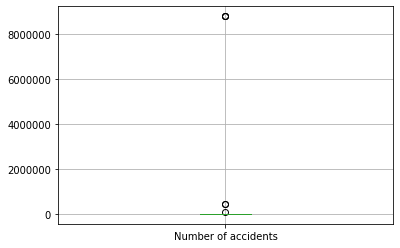

In [151]:
data.boxplot(column=['Number of accidents']) # We have one outlier

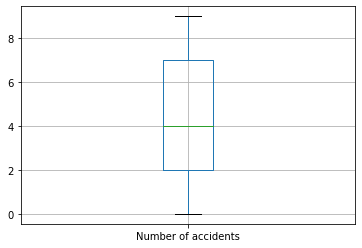

In [152]:
# Remove it ;plot it again
data=data[data['Number of accidents'].between(0,1000,inclusive=True)]
data.boxplot(column=['Number of accidents'])

In [153]:
#? Financial Losses due to claims
data['Financial losses due to claims'].head()



0     27
1    167
2    105
3     73
4    259
Name: Financial losses due to claims, dtype: object

In [154]:
data=data[data['Financial losses due to claims'].astype(str).str.isdigit()]

In [155]:
data['Financial losses due to claims']=data['Financial losses due to claims'].apply(lambda x:pd.to_numeric(x))

In [156]:
data['Financial losses due to claims'].describe()

count    9.848000e+03
mean     8.476441e+09
std      8.411773e+11
min      0.000000e+00
25%      7.400000e+01
50%      1.480000e+02
75%      2.250000e+02
max      8.347599e+13
Name: Financial losses due to claims, dtype: float64

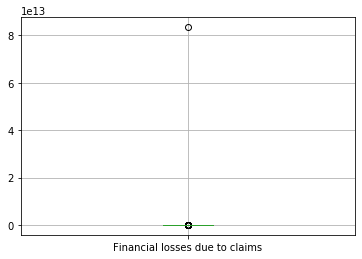

In [157]:
data.boxplot(column=['Financial losses due to claims'])

In [158]:
data=data[data['Financial losses due to claims'].between(0,1000,inclusive=True)]

In [159]:
#? Rider salary per month
data['Rider salary p.M.'].head()

0    2611
1    2260
2    2010
3    2792
4    2905
Name: Rider salary p.M., dtype: object

In [160]:
data=data[data['Rider salary p.M.'].astype(str).str.isdigit()]

In [161]:
data['Rider salary p.M.']=data['Rider salary p.M.'].apply(lambda x:pd.to_numeric(x))

In [162]:
data['Rider salary p.M.'].describe()

count    9.829000e+03
mean     1.001883e+09
std      9.922778e+10
min      2.000000e+03
25%      2.245000e+03
50%      2.497000e+03
75%      2.750000e+03
max      9.837569e+12
Name: Rider salary p.M., dtype: float64

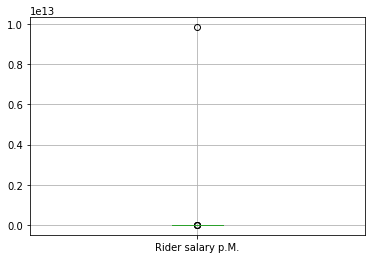

In [163]:
data.boxplot(column=['Rider salary p.M.'])

In [164]:
data=data[data['Rider salary p.M.'].between(0,3000,inclusive=True)]

In [165]:
#? Insurance boolean variable
data['Insurance Y/N'].head()

0    Y
1    N
2    N
3    N
4    N
Name: Insurance Y/N, dtype: object

In [166]:
pd.value_counts(data['Insurance Y/N'])

Y     4930
N     4891
ok       4
Name: Insurance Y/N, dtype: int64

In [167]:
data=data[data['Insurance Y/N'].isin(['Y','N'])]

In [168]:
#? Number of deliveries per day
data['Number of deliveries p.D.'].head()

0    119
1    130
2     92
3    137
4     73
Name: Number of deliveries p.D., dtype: int64

In [169]:
data['Number of deliveries p.D.'].describe()

count    9821.000000
mean      100.217289
std        29.091474
min        50.000000
25%        75.000000
50%       101.000000
75%       125.000000
max       150.000000
Name: Number of deliveries p.D., dtype: float64

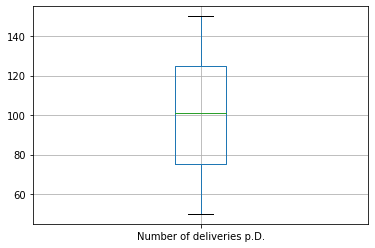

In [170]:
data.boxplot(column=['Number of deliveries p.D.'])

In [171]:
data.drop(data.tail(1).index,inplace=True)

In [172]:
data

,#,Number of rider,List of operating countries,List of entities,Type of employment,Type of transport means,Number of accidents,Financial losses due to claims,Rider salary p.M.,Insurance Y/N,Number of deliveries p.D.,Delivery date,Delivery time
0,523,3136,Turkey,Yemeksepeti,third party rider,Bike,6,27,2611,Y,119,2020-04-30 00:00:00,00:03
1,680,3121,Turkey,Yemeksepeti,third party rider,Scooter,5,167,2260,N,130,2020-04-30 00:00:00,19:20
2,641,1187,Turkey,Yemeksepeti,freelance rider,Foot,4,105,2010,N,92,2020-04-30 00:00:00,02:40
3,326,429,Turkey,Yemeksepeti,own rider,Bike,1,73,2792,N,137,2020-04-30 00:00:00,07:44
4,656,609,Turkey,Yemeksepeti,third party rider,Bike,0,259,2905,N,73,2020-04-30 00:00:00,20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9076,1168,Turkey,Yemeksepeti,freelance rider,Bike,1,155,2096,Y,128,2018-04-01 00:00:00,09:45
9994,9418,3197,Turkey,Yemeksepeti,freelance rider,Bike,5,51,2103,N,122,2018-04-01 00:00:00,23:56
9995,9774,814,Turkey,Yemeksepeti,own rider,Bike,5,49,2503,Y,123,2018-04-01 00:00:00,09:11
9996,9828,466,Turkey,Yemeksepeti,freelance rider,Bike,4,123,2186,N,50,2018-04-01 00:00:00,23:06


In [173]:
# this variable is fine

In [174]:
## Save the cleaned data

In [175]:
# Change the tedious column names to something we can recall easily
data.columns=['id','num_of_rider','country','city','employment','transport','accidents','losses','salary','insurance','deliveries','date','time']

In [176]:
data.to_csv('cleaned_data.csv')

In [177]:
#! Keep delivery date and time separate for now - time series model
#! First try to understand the variables we have so far and how it affects number of accidents

################################################################################################

In [178]:
# Correlation between variables
import seaborn as sns
#data=pd.read_csv('cleaned_data.csv')

In [179]:
# subset of the dataset without unwanted variables
data=data[['employment','transport','accidents','losses','salary','insurance','deliveries']]

In [180]:
# encode all the variables
#? Employment
# 1- Own rider
# 2- Freelance Rider
# 3- Third Party Rider

data['employment']=data['employment'].replace(['third party rider'],3)
data['employment']=data['employment'].replace(['freelance rider'],2)
data['employment']=data['employment'].replace(['own rider'],1)

#? Transport
data['transport']=data['transport'].replace(['Scooter'],3)
data['transport']=data['transport'].replace(['Bike'],2)
data['transport']=data['transport'].replace(['Foot'],1)

#? Insurance
data['insurance']=data['insurance'].replace(['Y'],1)
data['insurance']=data['insurance'].replace(['N'],0)

/Users/deepz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/deepz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/deepz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [181]:
# Heatmap to check correlation
corr=data.corr()

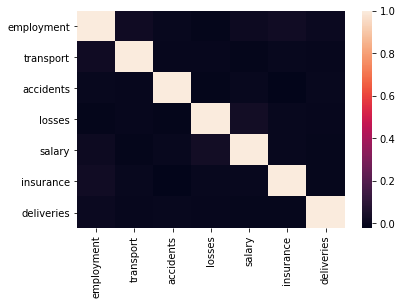

In [182]:
sns.heatmap(corr)


In [183]:
# dont appear to be correlated

In [184]:
#! Question: How do the variables affect accidents?
data.groupby(['employment'])['accidents'].sum()


employment
1    18396
2    12887
3    13118
Name: accidents, dtype: int64

In [185]:
#! Own riders have more accidents than others by over 5000

In [186]:
data.groupby(['transport'])['accidents'].sum()

transport
1    12246
2    12231
3    19924
Name: accidents, dtype: int64

In [187]:
#! More accidents on Scooter by over 7000 as compared to by foot or on bike

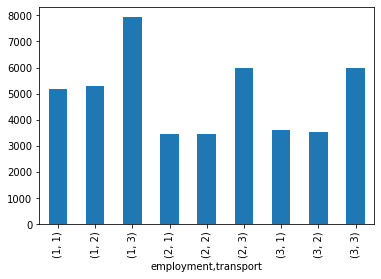

In [188]:
data.groupby(['employment','transport'])['accidents'].sum().plot(kind='bar')

In [189]:
#! Most accidents by Own riders on Scooters followed by third party on scooters

In [190]:
# Categories (5, interval[float64]): 
# [(1999.0, 2200.0] < (2200.0, 2400.0] < (2400.0, 2600.0] < (2600.0, 2800.0] < (2800.0, 3000.0]]
data['salary']=pd.cut(data.salary,5,labels=False)
pd.value_counts(data.salary)

/Users/deepz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    2009
1    1968
4    1952
2    1949
3    1942
Name: salary, dtype: int64

In [191]:
# almost equal number of riders in each salary bucket from 2000 to 3000

In [192]:
data.groupby(['salary'])['accidents'].sum()


salary
0    9117
1    8922
2    8737
3    8738
4    8887
Name: accidents, dtype: int64

In [193]:
# almost same number of accidents in all salary buckets

In [194]:
data.groupby(['insurance'])['accidents'].sum() 

insurance
0    22417
1    21984
Name: accidents, dtype: int64

In [195]:
# no significant difference b/w riders with or without insurance

In [196]:
#Categories (5, interval[float64]): 
# [(49.9, 70.0] < (70.0, 90.0] < (90.0, 110.0] < (110.0, 130.0] < (130.0, 150.0]]
data['deliveries']=pd.cut(data.deliveries,5,labels=False)
pd.value_counts(data.deliveries)

/Users/deepz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1996
3    1987
1    1957
4    1940
2    1940
Name: deliveries, dtype: int64

In [197]:
data.groupby(['deliveries'])['accidents'].sum()

deliveries
0    9020
1    8931
2    8839
3    8776
4    8835
Name: accidents, dtype: int64

In [198]:
#! Conclusion: No discernable effect of either variable on accidents other than employment and transport

In [199]:
pwd

'/Users/deepz/Downloads'

In [ ]:
#! Proceed with time series modelling approaches